In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Problem 1: tweet classification - Trudeau vs Trump

In [2]:
# load the data
url = url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/twitter.csv'
data = pd.read_csv(url)
data.head()

,timestamp,text,user
0,2020-03-02 23:06:03,"WOW! Thank you, just landed, see everyone soon...",realDonaldTrump
1,2020-03-02 21:47:49,Departing for the Great State of North Carolin...,realDonaldTrump
2,2020-03-02 21:32:54,They are staging a coup against Bernie!,realDonaldTrump
3,2020-03-02 19:55:40,THANK YOU!https://www.breitbart.com/tech/2020/...,realDonaldTrump
4,2020-03-02 19:55:07,Michelle @FischbachMN7 is running for Congress...,realDonaldTrump


This is a corpus of tweets from Donald Trump and Justin Trudeau. 
The **goal** is to build a classification pipeline that predicts the author (Trump or Trudeau) of a tweet based on the text.

**Part 1:** Define the feature matrix X and the target vector y from the dataframe, and then split X and y into training and testing sets.

In [3]:
# Feature matrix X, target vector y
X = data.text
y = data.user

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Part 2:** build a classification pipeline (count vectorizer + Naive Bayes model), and fit the pipeline to the training data.

In [4]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')), ('clf', MultinomialNB())])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('clf', MultinomialNB())])

**Part 3:** Evaluate the performance of your classification pipeline on the test set

accuracy: 0.9471698113207547


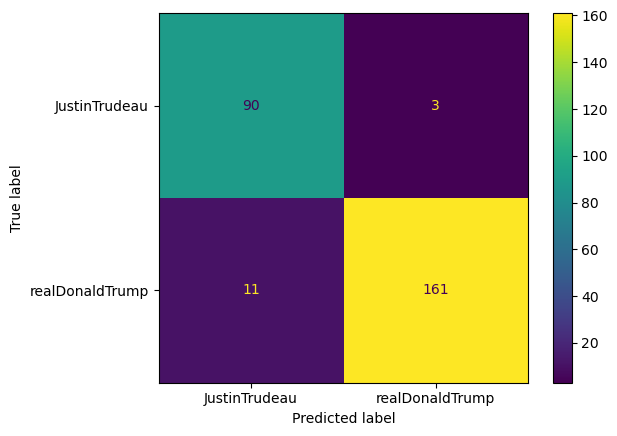

In [5]:
# Evaluate the performance of your classification pipeline on the test set
y_pred = text_clf.predict(X_test)
print('accuracy:',accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf.classes_)
disp.plot()

**Part 4:** What words does the model use to choose between Trump or Trudeau

In [6]:
# What words does the model use to choose between the two classes?
feature_names = text_clf.named_steps['vect'].get_feature_names_out()
for i in range(len(text_clf.classes_)):
    print(f"Class: {text_clf.classes_[i]}")
    top_features_indices = text_clf.named_steps['clf'].feature_log_prob_[i].argsort()[-10:][::-1]
    for j in top_features_indices:
        print(f"{feature_names[j]} (log prob: {text_clf.named_steps['clf'].feature_log_prob_[i][j]})")
    print("\n")

Class: JustinTrudeau
19 (log prob: -4.350672855076999)
covid (log prob: -4.364371699435161)
https (log prob: -4.489075177936118)
ca (log prob: -4.8867581456022275)
help (log prob: -4.898454185365418)
pm (log prob: -4.9343861945914815)
en (log prob: -4.946656287183296)
need (log prob: -4.959078807181854)
com (log prob: -4.971657589388713)
support (log prob: -5.010372101569404)


Class: realDonaldTrump
com (log prob: -4.159811706110124)
twitter (log prob: -4.244369094138186)
great (log prob: -4.460186605360323)
https (log prob: -4.504970207987297)
status (log prob: -4.6265773400820835)
news (log prob: -4.847568038035192)
thank (log prob: -4.902830716710241)
people (log prob: -5.253033146143356)
fake (log prob: -5.3911834846241735)
just (log prob: -5.508966520280557)




**Bonus:** can you write a Trump or Trudeau tweet?

In [8]:
text = 'We need to support our people.'
print(text_clf.predict([text]))

text = 'This is just such a great, great country people.'
print(text_clf.predict([text]))

['JustinTrudeau']
['realDonaldTrump']
